In [103]:
import pandas as pd
import numpy as np


In [104]:
df = pd.read_csv('C:/Users/User/Downloads/New York.csv')
df

,passenger_count,trip_distance in km,tip_amount,Average speed in km/h,Pull_tourist,Dropp_tourist,Weekend,events_count,feelslike,opad,...,passenger_count*pull_tourist,average_speed*dropp_tourist,average_speed*pull_tourist,average_speed*dropp_tourist*pull_tourist,average_speed*rush_hours_1,average_speed*rush_hours_2,average_speed*rush_hours_3,dropp_tourist*pull_tourist,wind*opad,feelslike*opad
0,1.0,19.9,0.00,44.7,0,0,1,1473,3.1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,3.0,7.9,2.00,23.0,0,0,1,1612,-7.8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,0.0,-0.0
2,1.0,2.9,1.95,20.2,0,0,1,1612,-7.4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.2,0,0.0,-0.0
3,2.0,30.2,0.00,34.3,0,0,1,1409,4.1,0,...,0.0,0.0,0.0,0.0,0.0,34.3,0.0,0,0.0,0.0
4,1.0,3.1,0.00,8.8,0,0,0,1148,11.2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.3,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446540,1.0,26.2,13.27,36.2,1,1,0,12950,16.1,0,...,1.0,36.2,36.2,36.2,0.0,36.2,0.0,1,0.0,0.0
446541,2.0,32.9,16.28,51.5,1,0,0,8774,21.1,0,...,2.0,0.0,51.5,0.0,0.0,51.5,0.0,0,0.0,0.0
446542,1.0,5.0,4.46,10.2,0,0,0,5155,19.6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
446543,1.0,11.2,5.36,36.9,0,0,0,10327,17.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [105]:
df['tip_amount_classification'] = pd.DataFrame(np.where(df['tip_amount'] == 0.0, 0, 1))

In [4]:
import matplotlib.pyplot as plt
x_distance = df[df['tip_amount_classification']==0]['trip_distance in km']
x_speed = df[df['tip_amount_classification']==0]['Average speed in km/h']
                                                                                                  

In [5]:
y_distance = df[df['tip_amount_classification']==1]['trip_distance in km']
y_speed = df[df['tip_amount_classification']==1]['Average speed in km/h']


In [6]:
x = x.reset_index()
y = y.reset_index()
pd.concat([x,y], axis=1).to_excel('trip_distance_new_york_classification.xlsx')
#x.to_excel('trip_distance_0.xlsx')

NameError: name 'x' is not defined

In [106]:
x_distance = df[df['tip_amount_classification']==0]['trip_distance in km']
x_speed = df[df['tip_amount_classification']==0]['Average speed in km/h']
y_distance = df[df['tip_amount_classification']==1]['trip_distance in km']
y_speed = df[df['tip_amount_classification']==1]['Average speed in km/h']


lista_1 = []
lista_2 = []

for i in np.arange(0,50,0.5):
    lista_1.append(x_distance[(x_distance>=i) & (x_distance<i+0.5)].shape[0]/x_distance.shape[0])
    lista_2.append(y_distance[(y_distance>=i) & (y_distance<i+0.5)].shape[0]/y_distance.shape[0])
    
wykres_distance = pd.DataFrame(columns = ['wartość', 'gęstość_0', 'gęstość_1'])
wykres_distance['wartość'] = np.arange(0,50,0.5)
wykres_distance['gęstość_0'] = lista_1
wykres_distance['gęstość_1'] = lista_2

lista_1 = []
lista_2 = []

for i in np.arange(0,85,1):
    lista_1.append(x_speed[(x_speed>=i) & (x_speed<i+1)].shape[0]/x_speed.shape[0])
    lista_2.append(y_speed[(y_speed>=i) & (y_speed<i+1)].shape[0]/y_speed.shape[0])
    
wykres_speed = pd.DataFrame(columns = ['wartość', 'gęstość_0', 'gęstość_1'])
wykres_speed['wartość'] = np.arange(0,85,1)
wykres_speed['gęstość_0'] = lista_1
wykres_speed['gęstość_1'] = lista_2



In [5]:
df = pd.read_csv('C:/Users/User/Documents/New York_plot.csv')
df['tip_amount_classification'] = pd.DataFrame(np.where(df['tip_amount'] == 0.0, 0, 1))

In [107]:
from datetime import datetime, timedelta

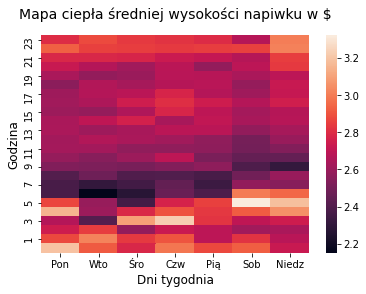

In [515]:
rows = np.arange(23,-1,-1)
cols = ['Pon', 'Wto', 'Śro', 'Czw', 'Pią', 'Sob', 'Niedz']
#cols = np.array(range(1,8))
matrix = pd.DataFrame(columns=cols,index=rows, dtype = 'float')

lista = []
lista2 = []

for i in range(df.shape[0]):
    lista.append(datetime.strptime(df['tpep_pickup_datetime'][i], '%Y-%m-%d %H:%M:%S').isoweekday())
    lista2.append(datetime.strptime(df['tpep_pickup_datetime'][i], '%Y-%m-%d %H:%M:%S').hour)


df['weekday'] = lista
df['hour'] = lista2

for i in range(1,8):
    for ii in np.arange(23,-1,-1):
        df_helper = df[(df['weekday'] == i) & (df['hour'] == ii)]
        matrix.iloc[-ii+23,i-1] = df_helper['tip_amount'].mean()


import seaborn as sns

heatmap = sns.heatmap(matrix)
fig = heatmap.get_figure()
plt.title('Mapa ciepła średniej wysokości napiwku w $', y=1.05, fontsize = 14)
plt.xlabel('Dni tygodnia', fontsize = 12)
plt.ylabel('Godzina', fontsize = 12)
fig.savefig('Wykres_3.pdf')


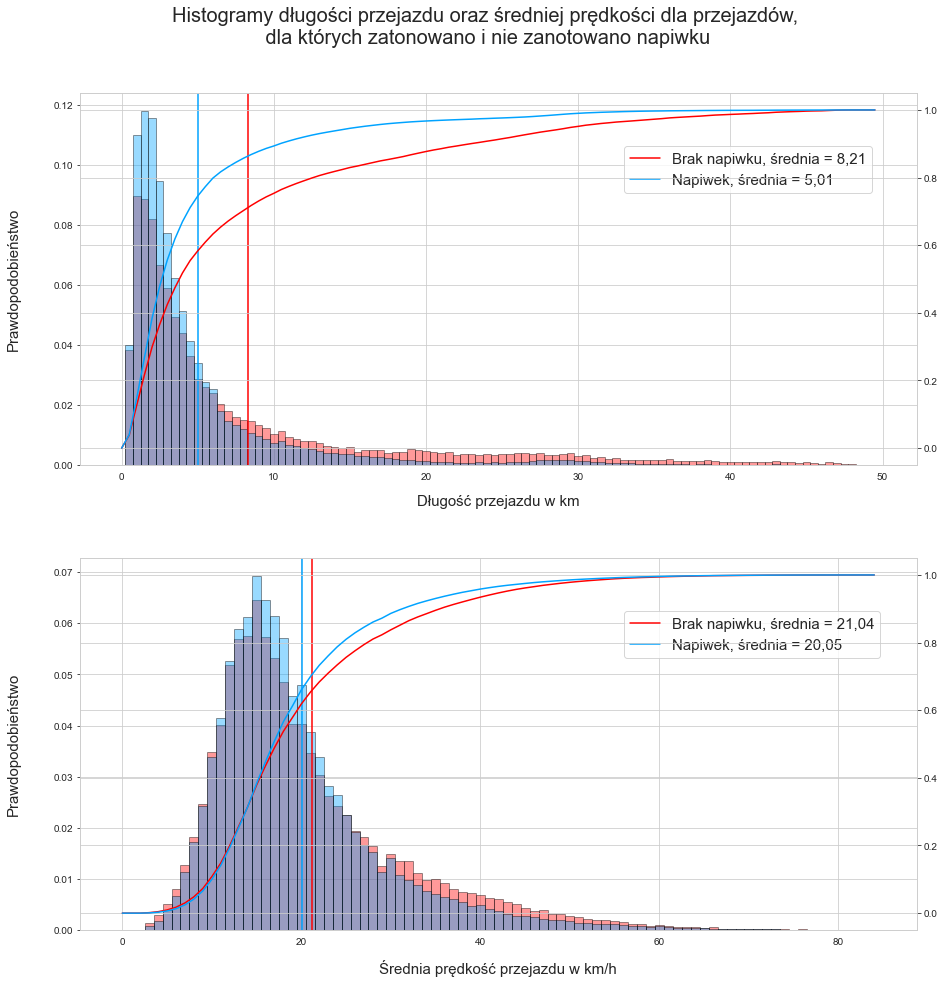

In [108]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, figsize = (15,15))
fig.subplots_adjust(hspace = 0.25, top = 0.90)
fig.suptitle('Histogramy długości przejazdu oraz średniej prędkości dla przejazdów,\n dla których zatonowano i nie zanotowano napiwku', fontsize = 20)


ax[0].bar(wykres_distance['wartość'], wykres_distance['gęstość_0'], alpha = 0.4, color = 'red', edgecolor='black', width = 0.5)
ax[0].bar(wykres_distance['wartość'], wykres_distance['gęstość_1'], alpha=0.4, color = '#00A3FF', edgecolor='black', width = 0.5)
#ax[0].plot(wykres_distance['wartość'], wykres_distance['gęstość_0'].cumsum())
ax[0].axvline(x=x_distance.mean(), color = 'red')
ax[0].axvline(x=y_distance.mean(), color='#00A3FF')
#ax[0].text(9.8, 0.02, 'średnia' + ' = ' + str("{:.4f}".format(x_distance.mean())), rotation = 90)
#ax[0].text(5.9, 0.02, 'średnia' + ' = ' + str("{:.4f}".format(y_distance.mean())), rotation = 90)
ax[0].legend(['Brak napiwku, średnia = 8,21', 'Napiwek, średnia = 5,01'], fontsize = 15, loc = (0.65,0.73))
ax[0].set_ylabel('Prawdopodobieństwo', fontsize = 15)
ax[0].set_xlabel('Długość przejazdu w km', fontsize = 15)
ax[0].xaxis.set_label_coords(0.5, -0.08)
ax[0].yaxis.set_label_coords(-0.07, 0.5)
ax0b = ax[0].twinx()
ax0b.plot(wykres_distance['wartość'], wykres_distance['gęstość_0'].cumsum(), color = 'red')
ax0b.plot(wykres_distance['wartość'], wykres_distance['gęstość_1'].cumsum(), color = '#00A3FF')

ax[1].bar(wykres_speed['wartość'], wykres_speed['gęstość_0'], alpha = 0.4, color = 'red', edgecolor='black', width = 1)
ax[1].bar(wykres_speed['wartość'], wykres_speed['gęstość_1'], alpha=0.4, color = '#00A3FF', edgecolor='black', width= 1)
ax[1].axvline(x=x_speed.mean(), color = 'red')
ax[1].axvline(x=y_speed.mean(), color='#00A3FF')
ax[1].legend(['Brak napiwku, średnia = 21,04', 'Napiwek, średnia = 20,05'], fontsize = 15, loc = (0.65,0.73))
ax[1].set_ylabel('Prawdopodobieństwo', fontsize = 15)
ax[1].set_xlabel('Średnia prędkość przejazdu w km/h', fontsize = 15)
ax[1].xaxis.set_label_coords(0.5, -0.08)
ax[1].yaxis.set_label_coords(-0.07, 0.5)
#ax[1].text(20, 0.06, 'średnia' + ' = ' + str("{:.4f}".format(x_speed.mean())), rotation = 90)
#ax[1].text(25, 0.06, 'średnia' + ' = ' + str("{:.4f}".format(y_speed.mean())), rotation = 90)
ax1b = ax[1].twinx()
ax1b.plot(wykres_speed['wartość'], wykres_speed['gęstość_0'].cumsum(), color = 'red')
ax1b.plot(wykres_speed['wartość'], wykres_speed['gęstość_1'].cumsum(), color = '#00A3FF')

fig.savefig('Wykres_1.jpg')

NameError: name 'p' is not defined

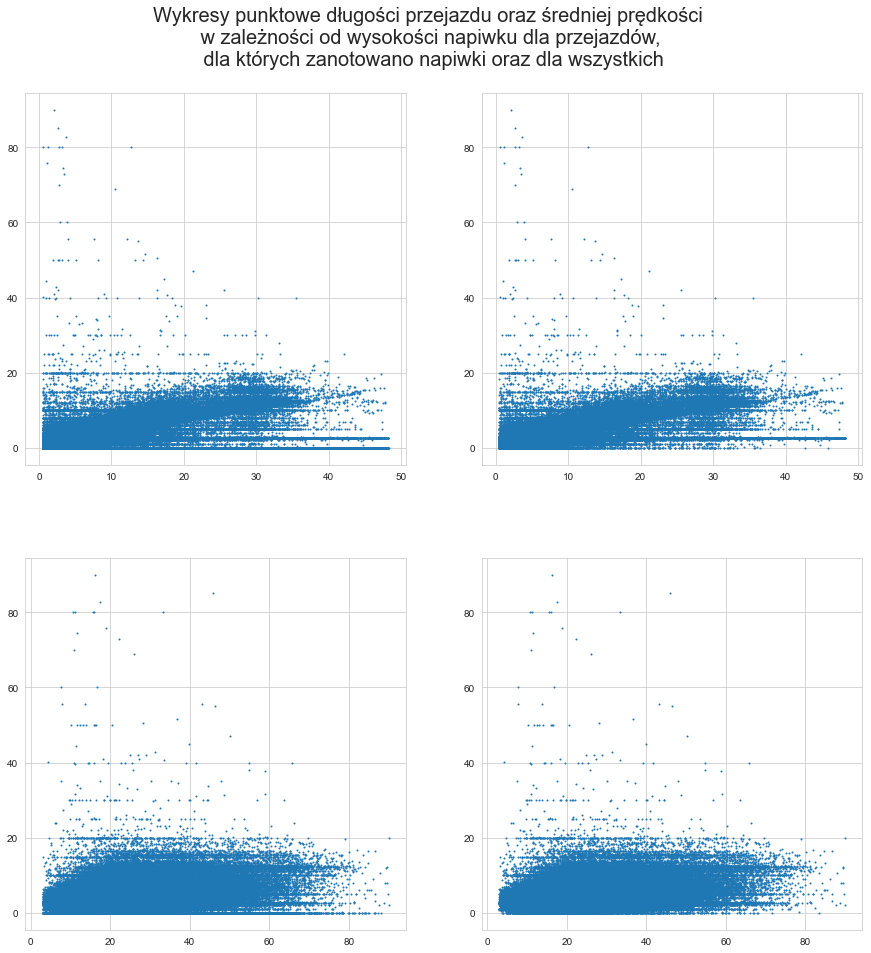

In [100]:
x_distance_scatter_full = df['trip_distance in km']  
y_distance_scatter_full = df['tip_amount']
z_distance_full = np.polyfit(x_distance_scatter_full,y_distance_scatter_full,1)
#p_distance_full = np.poly1d(z)

x_distance_scatter_1 = df[df['tip_amount'] !=0.0]['trip_distance in km'] 
y_distance_scatter_1 = df[df['tip_amount'] !=0.0]['tip_amount']
z_distance_1 = np.polyfit(x_distance_scatter_1,y_distance_scatter_1,1)
#p_distance_1 = np.poly1d(z)

x_speed_scatter_full = df['Średnia prędkość w km/h']  
y_speed_scatter_full = df['tip_amount']
z_speed_full = np.polyfit(x_speed_scatter_full,y_speed_scatter_full,1)
#p_speed_full = np.poly1d(z)

x_speed_scatter_1 = df[df['tip_amount'] !=0.0]['Średnia prędkość w km/h'] 
y_speed_scatter_1 = df[df['tip_amount'] !=0.0]['tip_amount']
z_speed_1 = np.polyfit(x_speed_scatter_1,y_speed_scatter_1,1)
#p_speed_1 = np.poly1d(z)


fig, ax = plt.subplots(2,2, figsize = (15,15))
fig.suptitle('Wykresy punktowe długości przejazdu oraz średniej prędkości \n w zależności od wysokości napiwku dla przejazdów, \n dla których zanotowano napiwki oraz dla wszystkich', fontsize = 20)
fig.subplots_adjust(hspace = 0.25, top = 0.90)

ax[0,0].scatter(x_distance_scatter_full,y_distance_scatter_full,1)
ax[0,1].scatter(x_distance_scatter_1,y_distance_scatter_1,1)
ax[1,0].scatter(x_speed_scatter_full,y_speed_scatter_full,1)
ax[1,1].scatter(x_speed_scatter_1,y_speed_scatter_1,1)
ax[0,0].plot(x_distance_scatter_full,p(x_distance_scatter_full), "r--")
ax[0,1].plot(x_distance_scatter_1,p(x_distance_scatter_1), "r--")
ax[1,0].plot(x_speed_scatter_full,p(x_speed_scatter_full), "r--")
ax[1,1].plot(x_speed_scatter_1,p(x_speed_scatter_1), "r--")

ax[0,0].legend(['Linia trendu = ' + str("{:.4f}".format(z_distance_full[0]))], fontsize=15)
ax[0,1].legend(['Linia trendu = ' + str("{:.4f}".format(z_distance_1[0]))], fontsize = 15)
ax[1,0].legend(['Linia trendu = ' + str("{:.4f}".format(z_speed_full[0]))], fontsize =15)
ax[1,1].legend(['Linia trendu = ' + str("{:.4f}".format(z_speed_1[0]))], fontsize =15)

ax[0,0].set_ylabel('Wysokość napiwku w $', fontsize = 15)
ax[0,0].set_xlabel('Długość przejazdu w km', fontsize = 15)
ax[0,1].set_ylabel('Wysokość napiwku w $', fontsize = 15)
ax[0,1].set_xlabel('Długość przejazdu w km', fontsize = 15)
ax[1,0].set_ylabel('Wysokość napiwku w $', fontsize = 15)
ax[1,0].set_xlabel('Średnia prędkość przejazdu w kmh', fontsize = 15)
ax[1,1].set_ylabel('Wysokość napiwku w $', fontsize = 15)
ax[1,1].set_xlabel('Średnia prędkość przejazdu w kmh', fontsize = 15)

fig.savefig('Wykres_2.jpg')

In [43]:
df = df[pd.to_datetime(df['tpep_pickup_datetime']) > datetime.strptime('2019-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')]
df = df.reset_index()

In [44]:
lista = []
lista2 = []

for i in range(df.shape[0]):
    lista.append(datetime.strptime(df['tpep_pickup_datetime'][i], '%Y-%m-%d %H:%M:%S').month)
    lista2.append(datetime.strptime(df['tpep_pickup_datetime'][i], '%Y-%m-%d %H:%M:%S').year)


df['month'] = lista
df['year'] = lista2

In [562]:
#rows = np.arange(1,13,1)
#cols = np.arange(2019, 2023, 1)
#season = pd.DataFrame(columns=cols,index=rows, dtype = 'float')

In [45]:
lista = []
for i in range(2019,2023):
    for ii in range(1,13):
        df_helper = df[(df['month'] == ii) & (df['year'] == i)]
        lista.append(df_helper['tip_amount'].mean())

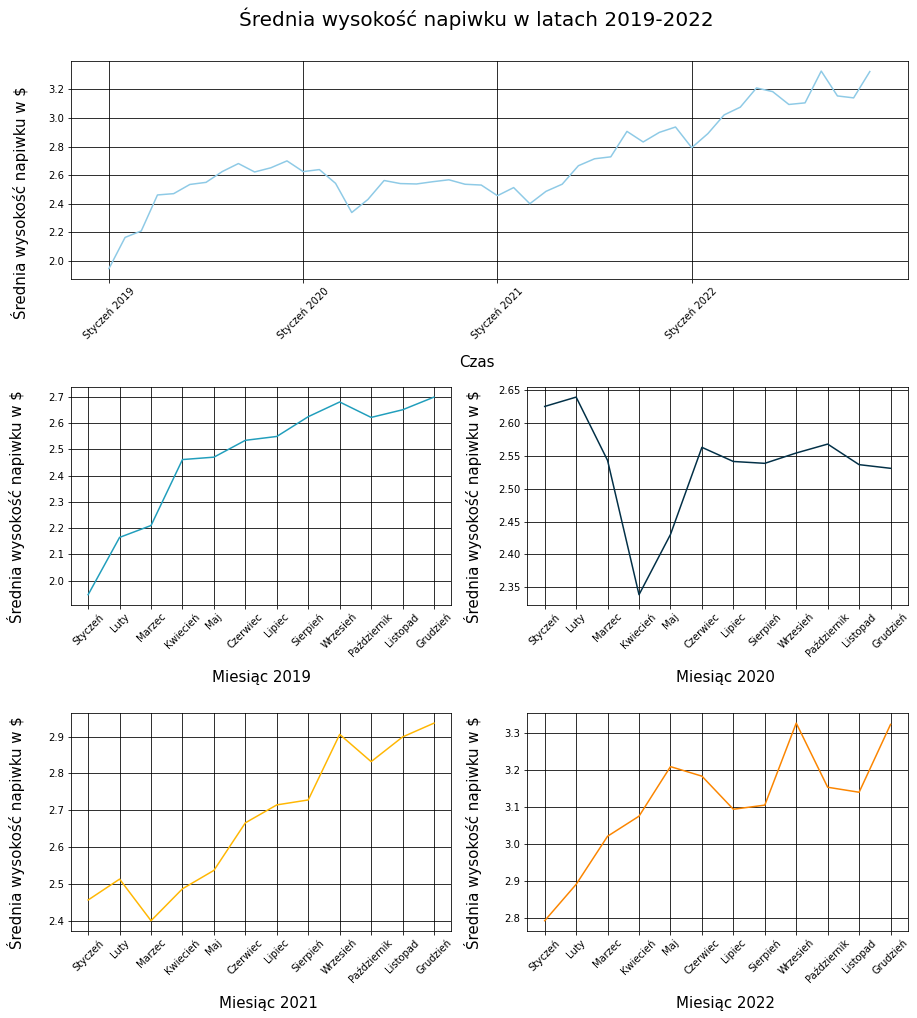

In [48]:
x = [0, 12, 24, 36]
x_sub = [x for x in range(0,12)]
labels = ['Styczeń 2019', 'Styczeń 2020', 'Styczeń 2021', 'Styczeń 2022']
labels_sub = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień']

fig = plt.figure(figsize = (15,15))
fig.subplots_adjust(hspace = 0.5, top = 0.93)
fig.suptitle('Średnia wysokość napiwku w latach 2019-2022', fontsize = 20)

gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

ax1.plot(lista, color = '#8ecae6')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 45)

ax2.plot(lista[0:12], color = '#219ebc')
ax3.plot(lista[12:24], color = '#023047')
ax4.plot(lista[24:36], color = '#ffb703')
ax5.plot(lista[36:48], color = '#fb8500')

ax2.set_xticks(x_sub)
ax2.set_xticklabels(labels_sub, rotation = 45)
ax3.set_xticks(x_sub)
ax3.set_xticklabels(labels_sub, rotation = 45)
ax4.set_xticks(x_sub)
ax4.set_xticklabels(labels_sub, rotation = 45)
ax5.set_xticks(x_sub)
ax5.set_xticklabels(labels_sub, rotation = 45)

ax1.set_xlabel('Czas', fontsize = 15)
ax1.xaxis.set_label_coords(0.485, -0.35)
ax2.set_xlabel('Miesiąc 2019', fontsize = 15)
ax2.xaxis.set_label_coords(0.5, -0.3)
ax3.set_xlabel('Miesiąc 2020', fontsize = 15)
ax3.xaxis.set_label_coords(0.52, -0.3)
ax4.set_xlabel('Miesiąc 2021', fontsize = 15)
ax4.xaxis.set_label_coords(0.52, -0.3)
ax5.set_xlabel('Miesiąc 2022', fontsize = 15)
ax5.xaxis.set_label_coords(0.52, -0.3)

ax1.set_ylabel('Średnia wysokość napiwku w $', fontsize = 15)
ax1.yaxis.set_label_coords(-0.05, 0.35)
ax2.set_ylabel('Średnia wysokość napiwku w $', fontsize = 15)
ax2.yaxis.set_label_coords(-0.12, 0.45)
ax3.set_ylabel('Średnia wysokość napiwku w $', fontsize = 15)
ax3.yaxis.set_label_coords(-0.12, 0.45)
ax4.set_ylabel('Średnia wysokość napiwku w $', fontsize = 15)
ax4.yaxis.set_label_coords(-0.12, 0.45)
ax5.set_ylabel('Średnia wysokość napiwku w $', fontsize = 15)
ax5.yaxis.set_label_coords(-0.12, 0.45)

ax1.grid(color = 'black')
ax2.grid(color = 'black')
ax3.grid(color = 'black')
ax4.grid(color = 'black')
ax5.grid(color = 'black')

fig.savefig('Wykres_4.jpg')

In [49]:
wykres_speed

,wartość,gęstość_0,gęstość_1
0,0,0.000000,0.000000
1,1,0.000000,0.000000
2,2,0.000000,0.000000
3,3,0.000076,0.000041
4,4,0.000266,0.000132
...,...,...,...
80,80,0.000000,0.000003
81,81,0.000000,0.000005
82,82,0.000000,0.000000
83,83,0.000000,0.000000


In [71]:
wykres_speed['gęstość_0'].cumsum()

0     0.000000
1     0.000000
2     0.000000
3     0.001408
4     0.004282
        ...   
80    0.999810
81    0.999810
82    0.999848
83    0.999848
84    0.999886
Name: gęstość_0, Length: 85, dtype: float64

In [77]:
x_distance_scatter_full
y_distance_scatter_full

0          0.00
1          3.16
2          1.96
3          0.00
4          1.70
          ...  
479995     1.76
479996     2.90
479997    10.00
479998     7.70
479999     3.05
Name: tip_amount, Length: 480000, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

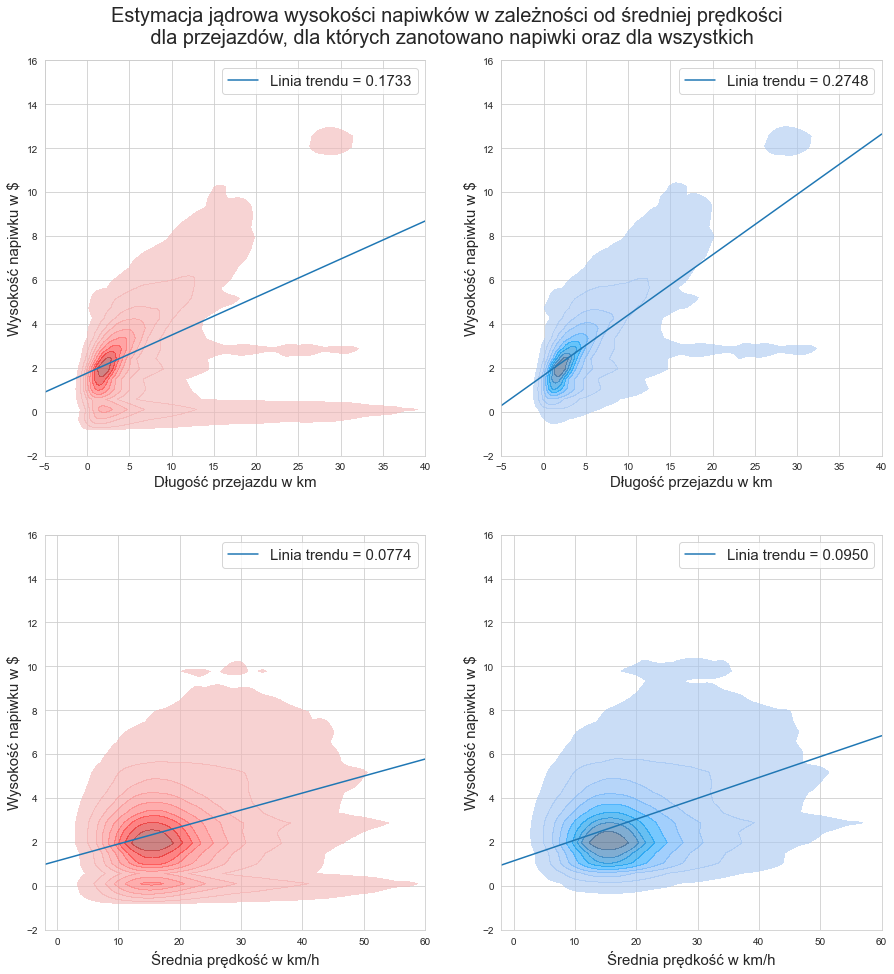

In [97]:
r1 = np.polyfit(x_distance_scatter_full, y_distance_scatter_full, 1)
r2 = np.polyfit(x_distance_scatter_1, y_distance_scatter_1, 1)
r3 = np.polyfit(x_speed_scatter_full, y_speed_scatter_full, 1)
r4 = np.polyfit(x_speed_scatter_1, y_speed_scatter_1, 1)


fig, axes = plt.subplots(2,2, figsize = (15,15))
fig.suptitle('Estymacja jądrowa wysokości napiwków w zależności od średniej prędkości \n dla przejazdów, dla których zanotowano napiwki oraz dla wszystkich', fontsize = 20)
fig.subplots_adjust(hspace = 0.2, top = 0.93)
sns.set_style('whitegrid')
sns.kdeplot(ax = axes[0,0], x = x_distance_scatter_full, y = y_distance_scatter_full, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(ax = axes[0,1], x = x_distance_scatter_1, y = y_distance_scatter_1, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = '#00A3FF')
sns.kdeplot(ax = axes[1,0], x = x_speed_scatter_full, y = y_speed_scatter_full, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(ax = axes[1,1], x = x_speed_scatter_1, y = y_speed_scatter_1, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = '#00A3FF')

axes[0,0].plot(range(-5,41), np.poly1d(r1)(range(-5,41)))
axes[0,1].plot(range(-5,41), np.poly1d(r2)(range(-5,41)))
axes[1,0].plot(range(-2,61), np.poly1d(r3)(range(-2,61)))
axes[1,1].plot(range(-2,61), np.poly1d(r4)(range(-2,61)))

axes[0,0].set_ylim([-2,16])
axes[0,0].set_xlim([-5,40])
axes[0,1].set_ylim([-2,16])
axes[0,1].set_xlim([-5,40])
axes[1,0].set_ylim([-2,16])
axes[1,0].set_xlim([-2,60])
axes[1,1].set_ylim([-2,16])
axes[1,1].set_xlim([-2,60])


axes[0,0].set_ylabel('Wysokość napiwku w $', fontsize = 15)
axes[0,0].set_xlabel('Długość przejazdu w km', fontsize = 15)
axes[0,1].set_ylabel('Wysokość napiwku w $', fontsize = 15)
axes[0,1].set_xlabel('Długość przejazdu w km', fontsize = 15)
axes[1,0].set_ylabel('Wysokość napiwku w $', fontsize = 15)
axes[1,0].set_xlabel('Średnia prędkość w km/h', fontsize = 15)
axes[1,1].set_ylabel('Wysokość napiwku w $', fontsize = 15)
axes[1,1].set_xlabel('Średnia prędkość w km/h', fontsize = 15)

axes[0,0].legend(['Linia trendu = ' + str("{:.4f}".format(r1[0]))], fontsize=15)
axes[0,1].legend(['Linia trendu = ' + str("{:.4f}".format(r2[0]))], fontsize = 15)
axes[1,0].legend(['Linia trendu = ' + str("{:.4f}".format(r3[0]))], fontsize =15)
axes[1,1].legend(['Linia trendu = ' + str("{:.4f}".format(r4[0]))], fontsize =15)

duration = 5000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

fig.savefig('Wykres_kernel.jpg')
fig.savefig('Wykres_kernel.pdf')

(1.0, 60.0)

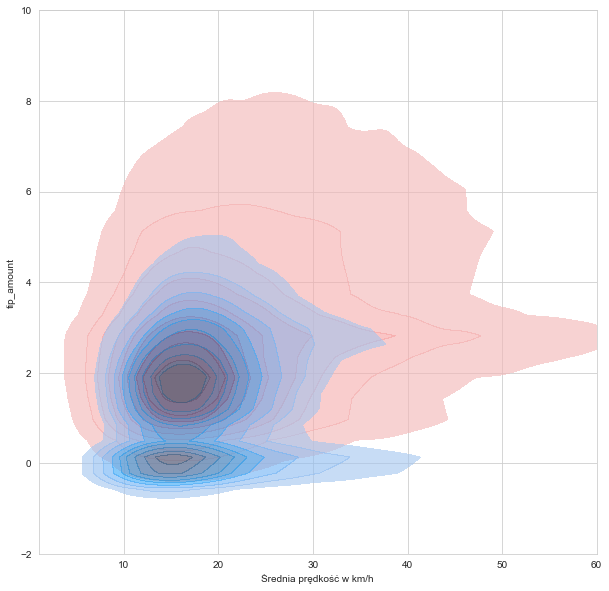

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.kdeplot(x = x_speed_scatter_1[0:100000], y = y_speed_scatter_1[0:100000], fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(x = x_speed_scatter_full[0:100000], y = y_speed_scatter_full[0:100000], fill=True, thresh = 0.2, legend = True, alpha = 0.6)


2166.9589540958405

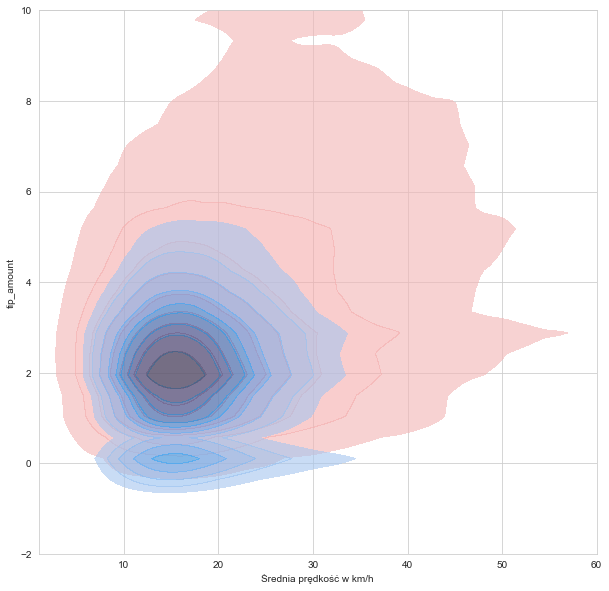

In [39]:
start = time.time()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.kdeplot(x = x_speed_scatter_1, y = y_speed_scatter_1, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(x = x_speed_scatter_full, y = y_speed_scatter_full, fill=True, thresh = 0.2, legend = True, alpha = 0.6)
plt.ylim([-2,10])
plt.xlim([1,60])
time.time() - start

3190.186550140381

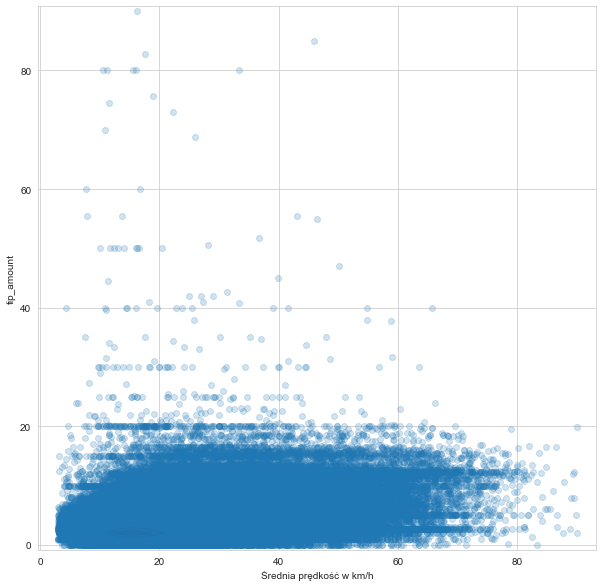

In [40]:
start = time.time()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.kdeplot(x = x_speed_scatter_1, y = y_speed_scatter_1, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(x = x_speed_scatter_full, y = y_speed_scatter_full, fill=True, thresh = 0.2, legend = True, alpha = 0.6)
plt.scatter(x = x_speed_scatter_1, y = y_speed_scatter_1, alpha = 0.2)
time.time() - start

1801.9502336978912

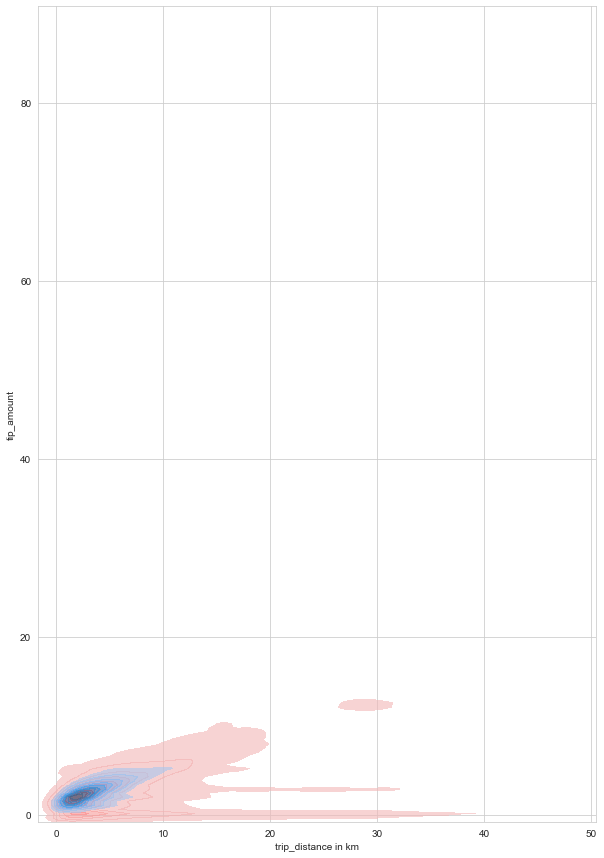

In [81]:
start = time.time()

fig, ax = plt.subplots(figsize=(10, 15))
sns.set_style('whitegrid')
sns.kdeplot(x = x_distance_scatter_full, y = y_distance_scatter_full, fill=True, thresh = 0.05, legend = True, alpha = 0.6, color = 'red')
sns.kdeplot(x = x_distance_scatter_1, y = y_distance_scatter_1, fill=True, thresh = 0.2, legend = True, alpha = 0.6)
#plt.ylim([-2,10])
#plt.xlim([1,60])
time.time() - start